In [ ]:
!pip install neo4j sentence-transformers scikit-learn spacy pandas apscheduler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Download spaCy's english model
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


This is test dataset

In [1]:
election_dataset = [
{
    "id": 1,
    "title": "DeSantis campaign shake-up amid shifting poll numbers",
    "date": "2023-11-05",
    "content": "Florida Governor Ron DeSantis has made significant changes to his presidential campaign staff in response to fluctuating poll numbers in key early primary states. The shake-up, which includes the replacement of his campaign manager and the hiring of several new senior advisors, comes as DeSantis seeks to regain momentum and close the gap with front-runner Donald Trump. Insiders say the moves reflect a recognition within the DeSantis camp that a reset is needed to better position the candidate for the long primary battle ahead. The restructuring also coincides with a shift in messaging, as DeSantis looks to emphasize his conservative record in Florida and draw sharper contrasts with his rivals on issues like COVID-19 response and education policy."
  },
  {
    "id": 2,
    "title": "Trump maintains commanding lead in Republican primary polls despite mounting legal woes",
    "date": "2023-11-07",
    "content": "Despite facing a growing number of legal challenges, former President Donald Trump continues to hold a dominating lead in Republican primary polls. A new national survey shows Trump with a double-digit advantage over his nearest rival, Florida Governor Ron DeSantis, as well as other declared and potential candidates. Trump's resilient support among the GOP base has remained largely unshaken by the multiple criminal investigations and civil suits he currently faces, ranging from the classified documents probe to allegations of election interference and financial improprieties. While some Republicans worry that Trump's legal baggage could become a liability in the general election, his allies argue that the controversies only serve to energize his loyal supporters and fuel anti-establishment sentiment."
  },
  {
    "id": 3,
    "title": "Republican candidates gear up for pivotal primary debate in Miami",
    "date": "2023-11-08",
    "content": "As the Republican presidential field takes shape, the declared candidates are intensely preparing for the first primary debate, set to take place in Miami later this month. The debate, hosted by a major conservative media outlet, will provide a crucial opportunity for contenders to introduce themselves to a national audience, draw distinctions with their opponents, and make the case for why they are best positioned to lead the party into the general election. Campaigns are honing their message, practicing mock debates, and studying policy briefing books in anticipation of the high-stakes encounter. With Donald Trump's participation still uncertain, the dynamics of the debate could have an outsized impact on the trajectory of the race and help winnow the crowded field."
  },
  {
    "id": 4,
    "title": "Biden campaign banks on legislative record and economic rebound",
    "date": "2023-11-09",
    "content": "As President Joe Biden gears up for his re-election campaign, his team is betting that a message centered on his administration's legislative accomplishments and the post-pandemic economic recovery will resonate with voters. Biden's campaign advisors point to the passage of major initiatives like the infrastructure bill, the CHIPS Act, and the Inflation Reduction Act as evidence of the President's ability to deliver on his promises and address long-standing national challenges. They also highlight the steady improvement in job growth, wage gains, and GDP numbers following the COVID-19 crisis as proof that Biden's economic policies are working. The campaign plans to showcase these achievements through a series of events, ads, and surrogate appearances in key swing states, arguing that they demonstrate Biden's competence and warrant a second term."
  },
  {
    "id": 5,
    "title": "Nikki Haley's star rises with strong debate showings",
    "date": "2023-11-10",
    "content": "Former South Carolina Governor and UN Ambassador Nikki Haley has seen her political stock rise in recent weeks following a series of well-received debate performances. Haley, who entered the race earlier this year, has used the national stage to showcase her foreign policy expertise, fiscal conservatism, and diverse background. Her sharp critiques of the Biden administration's international agenda and her calls for generational change in leadership have resonated with many Republican voters looking for a fresh face. Haley's polling numbers have ticked up in several early primary states, placing her firmly in the top tier of candidates and attracting increased media attention and donor support. While still trailing front-runners Donald Trump and Ron DeSantis, Haley's debate successes have positioned her as a potential dark horse in the race."
  },
  {
    "id": 6,
    "title": "Trump vows to power through 'witch hunt' probes",
    "date": "2023-11-12",
    "content": "Facing a barrage of legal challenges, former President Donald Trump is defiantly pledging to maintain a rigorous campaign schedule even as he battles investigations on multiple fronts. In recent appearances and statements, Trump has lashed out at the various probes as politically motivated 'witch hunts' designed to derail his candidacy and deny the will of his supporters. From the Mar-a-Lago classified documents case to the Manhattan DA's hush money inquiry to the Georgia election interference allegations, Trump insists that he will be fully vindicated and that the controversies will only harden the resolve of his base. Nonetheless, the mounting legal pressures have forced Trump to devote significant time and resources to his defense, prompting some Republicans to worry about the impact on his campaign and the party's broader prospects."
  },
  {
    "id": 7,
    "title": "DeSantis barnstorms Iowa, promises return to 'normality'",
    "date": "2023-11-14",
    "content": "In a clear sign of his Iowa ambitions, Florida Governor Ron DeSantis has embarked on an extensive tour of the first-in-the-nation caucus state, becoming the first declared Republican candidate to visit all 99 counties. DeSantis' 'Full Grassley' swing, modeled after Senator Chuck Grassley's annual tradition, underscores the importance his campaign is placing on a strong Iowa showing. At town halls, diner stops, and factory tours, DeSantis has sought to connect with voters by touting his record in Florida and promising a return to pre-pandemic 'normality' and 'common sense conservatism.' He has also taken aim at top rival Donald Trump, suggesting that Republicans need to move beyond the chaos and controversy of the Trump era in order to win back the White House."
  },
  {
    "id": 8,
    "title": "Republican rivals spar over Ukraine, economy in testy Miami debate",
    "date": "2023-11-15",
    "content": "The leading Republican presidential candidates clashed over foreign policy and economic issues in a fiery debate in Miami, drawing sharp contrasts on America's role in the world and the keys to national prosperity. The most heated exchanges came on the question of U.S. support for Ukraine, with some contenders arguing for a more hawkish stance against Russian aggression while others called for a pullback of American involvement. There were also stark divisions on trade, immigration, and the proper scope and scale of government, reflecting the diverse viewpoints within the Republican field. Throughout the night, the candidates took turns attacking front-runner Donald Trump, who loomed large over the proceedings despite his absence on stage. The debate ultimately showcased the deep ideological and stylistic fissures in the party as it seeks to chart a path back to the presidency."
  },
  {
    "id": 9,
    "title": "Quarterly filings hint at campaign funding hierarchy",
    "date": "2023-11-17",
    "content": "The latest round of quarterly campaign finance reports provided the clearest picture yet of the fundraising landscape in the Republican presidential primary. While Donald Trump maintained his overall cash advantage, Florida Governor Ron DeSantis posted an impressive haul that solidified his status as Trump's top rival. DeSantis raised more than all the other declared candidates combined, fueled by a network of large and small-dollar donors drawn to his conservative record and battleground state success. Other contenders, including Nikki Haley, Tim Scott, and Mike Pence, posted respectable totals but still trailed significantly behind the top two. The filings also revealed the differing spending patterns and burn rates of the campaigns, which could have implications for their long-term viability and ability to sustain operations through the primary marathon."
  },
  {
    "id": 10,
    "title": "Haley stakes out hawkish foreign policy lane",
    "date": "2023-11-20",
    "content": "In a major foreign policy address, Republican presidential candidate Nikki Haley laid out a muscular vision for American leadership on the global stage, drawing on her experience as UN ambassador. Speaking at a prominent Washington think tank, Haley called for a more assertive posture against adversaries like Russia, China, and Iran, arguing that recent Democratic administrations had emboldened these regimes through weakness and accommodation. She also pledged to strengthen traditional alliances, prioritize human rights, and promote democracy abroad. Haley's speech was seen as an effort to differentiate herself in a crowded primary field and establish her credentials as a potential commander-in-chief. It also marked a clear break with the non-interventionist streak that has animated parts of the Republican base in recent years."
  },
                       {
    "id": 11,
    "title": "DeSantis touts Florida success story in New Hampshire swing",
    "date": "2023-11-22",
    "content": "As the Republican race shifts to New Hampshire, Florida Governor Ron DeSantis is making the case that his leadership in the Sunshine State provides a model for the nation. In a series of town halls and rally speeches, DeSantis has highlighted his record on COVID-19 response, education reform, and law enforcement support, arguing that Florida's success story can be replicated at the federal level. He has also drawn implicit contrasts with chief rival Donald Trump, suggesting that his own governing style is more focused on policy results than personal drama. DeSantis' New Hampshire swing comes as he looks to build on his momentum from Iowa and establish himself as a serious contender in the first-in-the-nation primary state."
  },
  {
    "id": 12,
    "title": "Trump super PAC launches ad blitz in early states",
    "date": "2023-11-28",
    "content": "MAGA Inc., the super PAC supporting Donald Trump's presidential bid, has announced a major ad buy across key early primary and caucus states. The multimillion-dollar campaign will flood the airwaves in Iowa, New Hampshire, Nevada, and South Carolina with spots touting Trump's record in office and attacking his Republican rivals. The ads, which feature a mix of biographical content and red-meat conservative messaging, aim to solidify Trump's base and halt the rise of challengers like Ron DeSantis. The blitz reflects the central role that super PACs are expected to play in the 2024 race, given their ability to raise and spend unlimited funds on behalf of candidates. It also underscores Trump's enduring financial advantage and his campaign's belief that a show of force in the early states could help him run up the score and secure the nomination."
  },
  {
    "id": 13,
    "title": "Haley, Scott make pitch to diverse voters in Nevada",
    "date": "2023-12-01",
    "content": "Looking to make inroads with the diverse electorate in Nevada, Republican hopefuls Nikki Haley and Tim Scott have been crisscrossing the Silver State, holding events aimed at communities of color. Haley, the daughter of Indian immigrants, and Scott, the only Black Republican in the U.S. Senate, have argued that their candidacies represent a historic opportunity for the GOP to expand its tent and compete for minority voters who have traditionally backed Democrats. In appearances at Black churches, Latino small businesses, and Asian-American community centers, Haley and Scott have emphasized their personal stories and shared conservative values. Their Nevada outreach comes as the state's sizable minority populations are poised to play a decisive role in the early caucus contest and potentially shape the trajectory of the Republican race."
  },
  {
    "id": 14,
    "title": "Pence positions himself as true conservative, takes veiled swipes at Trump",
    "date": "2023-12-03",
    "content": "As he courts Iowa conservatives, former Vice President Mike Pence is increasingly drawing subtle distinctions with his one-time boss and current rival, Donald Trump. While careful not to directly criticize the former president, Pence has suggested that he represents a more consistent and principled brand of conservatism, one that is rooted in traditional values and limited government. He has also made veiled references to the January 6th Capitol riot, casting himself as a defender of the Constitution who stood up to pressure to overturn the 2020 election. Pence's delicate dance reflects the tricky position he finds himself in as someone who served loyally under Trump but now seeks to chart his own path to the presidency. His pitch to Iowa conservatives is that he can carry forward Trump's policy agenda without the accompanying baggage and drama."
  },
  {
    "id": 15,
    "title": "Republican rivals court influential GOP governors at Florida retreat",
    "date": "2023-12-08",
    "content": "The leading Republican presidential contenders descended on Palm Beach, Florida this week for a private retreat hosted by the Republican Governors Association. The event, held at a luxury resort, provided an opportunity for candidates to rub elbows with some of the party's most influential state executives and make the case for their campaigns. Notably absent was Florida Governor Ron DeSantis, who skipped the gathering in his own backyard, citing a scheduling conflict. But other hopefuls, including Donald Trump, Mike Pence, Nikki Haley, and Tim Scott, used the forum to tout their leadership credentials and gubernatorial alliances. The RGA retreat underscored the important role that Republican governors are expected to play in shaping the primary contest, both as potential kingmakers and as allies who can lend their political and organizational muscle to the eventual nominee."
  },
  {
    "id": 16,
    "title": "Trump, DeSantis spar over COVID response, electability in dueling Iowa appearances",
    "date": "2023-12-12",
    "content": "The simmering tensions between Republican front-runners Donald Trump and Ron DeSantis boiled over this week in a split-screen moment on the Iowa campaign trail. The two rivals, who have largely avoided direct confrontation thus far, traded barbs over their contrasting approaches to the COVID-19 pandemic and their prospects in a general election matchup against President Joe Biden. Trump, appearing at a rally in Des Moines, painted DeSantis as a lockdown-happy liberal who had mismanaged Florida's response to the virus. Hours later, at a town hall in Cedar Rapids, DeSantis fired back, casting Trump as an unreliable and polarizing figure who would alienate swing voters and jeopardize Republican chances of retaking the White House. The dueling appearances, and the increasingly explicit attacks, marked a new phase in the Trump-DeSantis rivalry that could define the Republican race in the months ahead."
  },
  {
    "id": 17,
    "title": "South Carolina emerges as key battleground with Haley, Scott, Pence vying for home state edge",
    "date": "2023-12-14",
    "content": "As the Republican primary calendar takes shape, South Carolina is looming as a critical early state that could tip the balance of the race. The Palmetto State is home turf for three declared or potential candidates - Nikki Haley, Tim Scott, and Mike Pence - each of whom is hoping to leverage their local ties and political networks to score a breakthrough victory. Haley, who served as the state's governor before becoming UN ambassador, has been assiduously courting her former constituents and donors. Scott, a sitting U.S. senator, has been playing up his compelling personal story and close relationship with the state's popular junior senator, Lindsey Graham. And Pence, who has deep connections to South Carolina's evangelical community, has been making regular visits and touting his conservative bona fides. The trio's home state rivalry adds an extra layer of intrigue to South Carolina's always unpredictable primary politics."
  },
  {
    "id": 18,
    "title": "Republican hopefuls woo mega-donors at private Texas retreat",
    "date": "2023-12-16",
    "content": "The leading Republican presidential candidates gathered this week at a posh resort outside Houston for a private confab with some of the party's biggest donors. The event, hosted by a group of influential Texas businessmen, provided a chance for the hopefuls to make their pitches to the deep-pocketed contributors who could help fuel their campaigns in the long primary slog ahead. Among those in attendance were Donald Trump, Ron DeSantis, Nikki Haley, and Mike Pence, each of whom held closed-door meetings and roundtable discussions with top Republican moneymen. The Texas retreat highlighted the outsized role that a handful of mega-donors are expected to play in the 2024 race, particularly given the changes to campaign finance laws that have empowered super PACs and other outside groups. It also underscored the strategic importance of Texas, a cash-rich state that is both a key primary battleground and a crucial general election prize."
  },
  {
    "id": 19,
    "title": "Pence slams Trump on trade, foreign policy in major economic address",
    "date": "2023-12-18",
    "content": "In a sweeping economic policy address, former Vice President Mike Pence offered a sharp critique of Donald Trump's record on trade and foreign affairs, signaling a new willingness to break with his former boss on key issues. Speaking at a forum hosted by a pro-business advocacy group, Pence argued that Trump's tariffs and trade wars had hurt American workers and consumers while damaging U.S. alliances abroad. He called for a return to traditional Republican principles of free trade, open markets, and robust international engagement. Pence also took aim at Trump's cozy relationship with Vladimir Putin, suggesting that it had emboldened Russian aggression and undermined U.S. interests. The speech marked Pence's most forceful attempt yet to distance himself from Trump and carve out a distinct lane in the Republican primary field."
  },
  {
    "id": 20,
    "title": "DeSantis wins key evangelical endorsement, gains ground in Iowa polls",
    "date": "2023-12-20",
    "content": "In a boost to his Iowa prospects, Florida Governor Ron DeSantis has secured the coveted endorsement of Bob Vander Plaats, an influential evangelical leader and kingmaker in the state's Republican politics. Vander Plaats, who heads the social conservative group The Family Leader, praised DeSantis as a principled fighter who has delivered on his promises and stood up for traditional values. The endorsement comes as new polling shows DeSantis gaining ground on Donald Trump in Iowa, narrowing the former president's once-commanding lead to a slim margin. DeSantis' rise in the Hawkeye State has been fueled by a surge of support among evangelical voters, who make up a large chunk of the Republican caucus electorate. The Vander Plaats endorsement and the polling bump suggest that DeSantis is consolidating the conservative base and emerging as Trump's most formidable challenger in the opening contest of the GOP nominating fight."
  },

]

To import actual data import  NYT_MONTH.json and Gaurdian.json (found zipped)

Gaurdian Articels Zipped due to size constraint

Merging of data code:
"""
def merge_jsons(files:list):
    total_file = []
    for file in files:
        with open(file, 'r') as current_file:
            data = json.load(current_file)
            for n in data:
                total_file.append(n)
            print(total_file)
    with open("combined_json.json", "w", encoding='utf-8') as my_file:
        json.dump(total_file, my_file, ensure_ascii=False, indent=2)
"""

In [2]:
# The Initial mapping
entity_normalization = {
    "Donald Trump": ["Donald Trump", "Trump", "Mr Trump", "Donald"],
    "Ron DeSantis": ["Ron DeSantis", "DeSantis", "Mr DeSantis"],
    "Nikki Haley": ["Nikki Haley", "Haley", "Ms Haley"],
    "Joe Biden": ["Joe Biden", "Biden", "President Biden", "Mr Biden"],
    "Republican Party": ["Republican", "GOP", "Republican Party"],
    "Democratic Party": ["Democratic", "Democrat", "Democratic Party"],
}

"""
Didn't have time to throuhgly test so left this out the pipeline

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# sample text
text = "Mr Trump and DeSantis had a meeting with President Biden."

# uniner version of entity normalization
def normalize_entities(text, entity_normalization):
    for key, aliases in entity_normalization.items():
        for alias in aliases:
            if fuzz.ratio(text, alias) > 80:  # fuzzy match threshold
                text = text.replace(alias, key)
    return text

# apply normalization
normalized_text = normalize_entities(text, entity_normalization)
print(normalized_text)
"""

# Convert the dictionary to lowercase and create a reverse lookup
entity_normalization = {
    canonical_name: [variant.lower() for variant in variants]
    for canonical_name, variants in entity_normalization.items()
}

reverse_lookup = {
    variant: canonical_name
    for canonical_name, variants in entity_normalization.items()
    for variant in variants
}

def normalize_entity(entity_text):
    return reverse_lookup.get(entity_text.lower(), entity_text)


In [ ]:
import spacy

In [ ]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def extract_focused_keywords(article):
    doc_content = nlp(article["content"])
    doc_title = nlp(article["title"])

    keywords = set()

    # Extract entities from content (Persons and Organizations) and normalize
    for ent in doc_content.ents:
        if ent.label_ in ["PERSON", "ORG"]:
            normalized = normalize_entity(ent.text)
            keywords.add(normalized)

    # Extract key terms from the title, normalize if they're entities
    for token in doc_title:
        if token.pos_ in ["NOUN", "VERB"] and not token.is_stop:
            lemma = token.lemma_
            # Normalize entity mentions in the title
            normalized = normalize_entity(lemma)
            keywords.add(normalized)

    # Ensure no lowercase duplicates like 'trump' if 'Donald Trump' exists
    final_keywords = set()
    for keyword in keywords:
        if keyword.lower() not in final_keywords:
            final_keywords.add(keyword)

    return list(final_keywords)

# Apply extraction to each article
for article in election_dataset:
    article["keywords"] = extract_focused_keywords(article)
print(election_dataset)

In [ ]:
# Sort articles by date
election_dataset.sort(key=lambda x: x['date'])

In [ ]:
from datetime import datetime, date

def get_date_range(dataset):
    # Convert all dates to datetime objects
    dates = [
        datetime.strptime(item['date'], "%Y-%m-%d") if isinstance(item['date'], str)
        else item['date'] if isinstance(item['date'], datetime)
        else datetime.combine(item['date'], datetime.min.time())  # Convert date to datetime
        for item in dataset
    ]
    min_date = min(dates)
    max_date = max(dates)
    return min_date, max_date

# Get the date range
start_date, end_date = get_date_range(election_dataset)

# Calculate the number of weeks between start_date and end_date
num_weeks = ((end_date - start_date).days) // 7 + 1

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.cluster import AgglomerativeClustering
from datetime import datetime, timedelta
from neo4j import GraphDatabase
import uuid

In [ ]:
NEO4J_URI = os.getenv('neo4j_uri')
NEO4J_USERNAME = os.getenv('neo4j_username')
NEO4J_PASSWORD = os.getenv('neo4j_password')

# Initialize the driver
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

In [ ]:
# Function to create weekly snapshots based on date range
def create_snapshots(driver, start_date, num_weeks):
    with driver.session() as session:
        for week in range(num_weeks):
            week_start = start_date + timedelta(weeks=week)
            week_end = week_start + timedelta(days=6)
            session.run("""
                MERGE (s:Snapshot {week_start: date($week_start), week_end: date($week_end)})
            """, week_start=week_start.strftime('%Y-%m-%d'), week_end=week_end.strftime('%Y-%m-%d'))
    print(f"Created {num_weeks} snapshots starting from {start_date.strftime('%Y-%m-%d')}")

In [ ]:
"""
def compute_embeddings(articles, openai_model, api_key):

    Compute embeddings for a list of articles using OpenAI's embedding API.
    Args:
        articles (list): List of article dictionaries with 'content' field.
        openai_model (str): OpenAI embedding model name.
        api_key (str): OpenAI API key for authentication.
    Returns:
        list: Articles with 'embedding' field added to each article.

    import openai
    openai.api_key = api_key

    # Extract content from articles
    contents = [article['content'] for article in articles]

    # Call OpenAI's embedding API
    embeddings = []
    for content in contents:
        response = openai.Embedding.create(
            model=openai_model,
            input=content
        )
        embeddings.append(response['data'][0]['embedding'])

    # Assign the computed embeddings to each article
    for idx, article in enumerate(articles):
        article['embedding'] = embeddings[idx]

    return articles
"""


In [ ]:
def compute_embeddings(articles, model):
    # Gets the content from articles and compute their embeddings
    contents = [article['content'] for article in articles]
    embeddings = model.encode(contents, convert_to_numpy=True)
    for idx, article in enumerate(articles):
        article['embedding'] = embeddings[idx]
    return articles

def cluster_articles(articles, distance_threshold=0.5):
    # Extracts embeddings from articles and perform clustering based on them
    embeddings = np.array([article['embedding'] for article in articles])
    article_ids = [article['id'] for article in articles]

    clustering = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=distance_threshold,
        metric='euclidean',
        linkage='ward'
    )
    clustering.fit(embeddings)

    clusters = defaultdict(list)
    for article_id, label in zip(article_ids, clustering.labels_):
        clusters[label].append(article_id)

    event_centroids = {}
    for label, ids in clusters.items():
        cluster_embeddings = [articles[article_ids.index(id)]['embedding'] for id in ids]
        centroid = np.mean(cluster_embeddings, axis=0)
        event_centroids[label] = centroid

    return clusters, event_centroids

def add_article(driver, article_id, title, content, created_date, decay_rate=0.01):
    # Ensures created_date is a datetime object
    if not isinstance(created_date, datetime):
        raise ValueError("created_date must be a datetime object")

    with driver.session() as session:
        session.run("""
            MERGE (a:Article {id: $article_id})
            SET a.title = $title,
                a.content = $content,
                a.created_date = datetime($created_date),
                a.decay_rate = $decay_rate
        """, article_id=article_id, title=title, content=content,
            created_date=created_date.strftime('%Y-%m-%dT%H:%M:%S'),
            decay_rate=decay_rate)

def add_event(driver, event_id, name, event_date, decay_rate=0.01):
    # Ensure event_date is an datetime object
    if not isinstance(event_date, datetime):
        raise ValueError("event_date must be a datetime object")

    with driver.session() as session:
        session.run("""
            MERGE (e:Event {id: $event_id})
            SET e.name = $name,
                e.created_date = datetime($event_date),
                e.decay_rate = $decay_rate,
                e.relevance = 1.0
        """, event_id=event_id, name=name,
            event_date=event_date.strftime('%Y-%m-%dT%H:%M:%S'),
            decay_rate=decay_rate)

def link_article_to_event(driver, article_id, event_id, strength):
    with driver.session() as session:
        session.run("""
            MATCH (a:Article {id: $article_id}), (e:Event {id: $event_id})
            MERGE (a)-[r:RELATED_TO]->(e)
            SET r.strength = $strength
        """, article_id=article_id, event_id=event_id, strength=strength)

def link_articles_to_events(driver, articles, clusters, event_centroids, cluster_label_to_event_id):
    # Links articles to events based on clustering
    event_id_to_centroid = {}
    article_ids = [article['id'] for article in articles]

    for label, article_ids_in_cluster in clusters.items():
        if label in cluster_label_to_event_id:
            event_id = cluster_label_to_event_id[label]
        else:
            event_id = f"Event_{uuid.uuid4()}"
            cluster_label_to_event_id[label] = event_id
            first_article_date = next(art['date'] for art in articles if art['id'] == article_ids_in_cluster[0])
            add_event(driver, event_id, f"Event {label}", first_article_date)

        event_centroid = event_centroids[label]
        event_id_to_centroid[event_id] = event_centroid

        for article_id in article_ids_in_cluster:
            article = next(art for art in articles if art['id'] == article_id)
            article_embedding = article['embedding'].reshape(1, -1)
            similarity = cosine_similarity(article_embedding, event_centroid.reshape(1, -1))[0][0]
            strength = max(0, min(1, similarity))
            link_article_to_event(driver, article_id, event_id, strength)

    return event_id_to_centroid

def set_event_base_relevance(driver, event_id):
    with driver.session() as session:
        session.run("""
            MATCH (e:Event {id: $event_id})
            SET e.relevance = 1.0
        """, event_id=event_id)

def apply_decay(driver, snapshot_date, decay_threshold=0.05):
    # Ensures snapshot_date is a datetime object
    if not isinstance(snapshot_date, datetime):
        raise ValueError("snapshot_date must be a datetime object")

    with driver.session() as session:
        # Updates relationship strengths based on decay
        session.run("""
            MATCH (n:Article)-[rel:RELATED_TO]->(e:Event)
            WHERE n.created_date <= datetime($snapshot_date)
            WITH n, e, rel, duration.between(n.created_date, datetime($snapshot_date)).days AS days
            SET rel.strength = rel.strength * exp(-n.decay_rate * days)
        """, snapshot_date=snapshot_date.strftime('%Y-%m-%dT%H:%M:%S'))

        # Deletes weak relationships below threshold
        session.run("""
            MATCH (n:Article)-[rel:RELATED_TO]->(e:Event)
            WHERE rel.strength < $decay_threshold
            DELETE rel
        """, decay_threshold=decay_threshold)

        # Updates event relevance by applying decay
        session.run("""
            MATCH (e:Event)
            WHERE e.created_date <= datetime($snapshot_date)
            WITH e, duration.between(e.created_date, datetime($snapshot_date)).days AS days
            SET e.relevance = e.relevance * exp(-e.decay_rate * days)
        """, snapshot_date=snapshot_date.strftime('%Y-%m-%dT%H:%M:%S'))

        # Deletes irrelevant events with low relevance
        session.run("""
            MATCH (e:Event)
            WHERE e.relevance < $decay_threshold
            DETACH DELETE e
        """, decay_threshold=decay_threshold)

def link_event_to_event(driver, event_id_1, event_id_2, strength):
    with driver.session() as session:
        session.run("""
            MATCH (e1:Event {id: $event_id_1}), (e2:Event {id: $event_id_2})
            MERGE (e1)-[r:SIMILAR_TO]->(e2)
            SET r.strength = $strength
        """, event_id_1=event_id_1, event_id_2=event_id_2, strength=strength)

def link_events(driver, all_event_centroids, threshold=0.5):
    # Links events that have similarity above a certain threshold
    event_ids = list(all_event_centroids.keys())
    centroids = np.array([all_event_centroids[event_id] for event_id in event_ids])
    similarities = cosine_similarity(centroids)

    for i in range(len(event_ids)):
        for j in range(i + 1, len(event_ids)):
            sim = similarities[i][j]
            if sim >= threshold:
                event_id_1 = event_ids[i]
                event_id_2 = event_ids[j]
                strength = sim
                link_event_to_event(driver, event_id_1, event_id_2, strength)

def simulate_articles_and_events(driver, model, articles, start_date, num_weeks):
    # Ensures start_date is a datetime object
    if not isinstance(start_date, datetime):
        raise ValueError("start_date must be a datetime object")

    # Converts all article dates to datetime if not already
    for article in articles:
        if isinstance(article['date'], datetime):
            continue
        elif isinstance(article['date'], date):
            article['date'] = datetime.combine(article['date'], datetime.min.time())
        else:
            article['date'] = datetime.strptime(article['date'], "%Y-%m-%d")

    snapshots = []
    cumulative_articles = []
    cluster_label_to_event_id = {}
    all_event_centroids = {}

    for week in range(num_weeks):
        week_start = start_date + timedelta(weeks=week)
        week_end = week_start + timedelta(weeks=1)
        week_articles = [article for article in articles if week_start <= article['date'] < week_end]

        for article in week_articles:
            if article not in cumulative_articles:
                add_article(driver, article['id'], article['title'], article['content'], article['date'])
                cumulative_articles.append(article)

        cumulative_articles = compute_embeddings(cumulative_articles, model)

        if len(cumulative_articles) > 1:
            clusters, event_centroids = cluster_articles(cumulative_articles)
        else:
            clusters = {0: [article['id'] for article in cumulative_articles]}
            event_centroids = {0: cumulative_articles[0]['embedding']}

        event_id_to_centroid = link_articles_to_events(driver, cumulative_articles, clusters, event_centroids, cluster_label_to_event_id)

        # Updates all_event_centroids with the new/updated events
        all_event_centroids.update(event_id_to_centroid)

        snapshot = {
            'week_start': week_start,
            'week_end': week_end - timedelta(days=1),
            'clusters': clusters
        }
        snapshots.append(snapshot)

        apply_decay(driver, week_end - timedelta(days=1))

    # After processing all weeks, link events to any events that are fairly similar
    link_events(driver, all_event_centroids, threshold=0.5)

    return snapshots, cluster_label_to_event_id


In [ ]:
# Create snapshots and simulate articles/events
create_snapshots(driver, start_date, num_weeks)

Created 7 snapshots starting from 2023-11-05


In [ ]:
# runs for snapshots
snapshots, cluster_label_to_event_id = simulate_articles_and_events(driver, model, election_dataset, start_date, num_weeks)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def fetch_weekly_snapshot(tx, start_date, end_date):
    query = """
    MATCH (a:Article)-[r:RELATED_TO]->(e:Event)
    WHERE a.created_date >= datetime($start_date) AND a.created_date <= datetime($end_date)
    RETURN a.id AS article_id, e.id AS event_id, r.strength AS strength
    """
    return list(tx.run(query, start_date=start_date, end_date=end_date))

def fetch_node_labels(tx, node_ids):
    query = """
    MATCH (n)
    WHERE n.id IN $node_ids
    RETURN n.id AS node_id, labels(n) AS labels
    """
    return {record["node_id"]: record["labels"] for record in tx.run(query, node_ids=node_ids)}

def visualize_snapshot(driver, snapshot_index, start_date, num_weeks):
    """
    Visualizes the specified snapshot.

    Parameters:
    - driver: Neo4j driver instance.
    - snapshot_index (int): Index of the snapshot to visualize (0-based).
    - start_date (datetime): The start date of the first snapshot.
    - num_weeks (int): Total number of snapshots (weeks).
    """
    if snapshot_index < 0 or snapshot_index >= num_weeks:
        raise ValueError(f"Snapshot index must be between 0 and {num_weeks - 1}")

    # Calculate the date range for the specified snapshot
    snapshot_start = start_date + timedelta(weeks=snapshot_index)
    snapshot_end = snapshot_start + timedelta(days=6)  # One week duration

    # Fetch the snapshot data
    with driver.session() as session:
        result = session.read_transaction(
            fetch_weekly_snapshot,
            snapshot_start.strftime('%Y-%m-%dT%H:%M:%S'),
            snapshot_end.strftime('%Y-%m-%dT%H:%M:%S')
        )

    if not result:
        print(f"No data found for Snapshot {snapshot_index}: {snapshot_start.date()} to {snapshot_end.date()}")
        return

    # Create a graph
    G = nx.Graph()

    # Sets to store unique Articles and Events
    article_ids = set()
    event_ids = set()

    # Add edges and collect node IDs
    for record in result:
        article_id = record["article_id"]
        event_id = record["event_id"]
        strength = record["strength"]

        G.add_edge(article_id, event_id, weight=strength)
        article_ids.add(article_id)
        event_ids.add(event_id)

    # Fetch node labels to determine types
    with driver.session() as session:
        node_labels = session.read_transaction(fetch_node_labels, list(article_ids.union(event_ids)))

    # Assign node types based on labels
    for node_id in G.nodes():
        labels = node_labels.get(node_id, [])
        if "Article" in labels:
            G.nodes[node_id]['type'] = 'Article'
        elif "Event" in labels:
            G.nodes[node_id]['type'] = 'Event'
        else:
            G.nodes[node_id]['type'] = 'Unknown'  # For any other node types

    # Define node colors based on type
    node_colors = []
    for node, data in G.nodes(data=True):
        if data['type'] == 'Article':
            node_colors.append('blue')  # Articles in blue
        elif data['type'] == 'Event':
            node_colors.append('red')   # Events in red
        else:
            node_colors.append('grey')  # Unknown types in grey

    # Define edge widths based on strength
    edge_weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]  # Scale for visibility

    # Generate positions for all nodes using spring layout for better visualization
    pos = nx.spring_layout(G, seed=42, k=0.5, iterations=50)

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Draw nodes
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=300,
        alpha=0.9
    )

    # Draw edges
    nx.draw_networkx_edges(
        G, pos,
        width=edge_weights,
        alpha=0.5
    )

    # Remove axis
    plt.axis('off')

    # Add title
    plt.title(f'Snapshot {snapshot_index}: {snapshot_start.date()} to {snapshot_end.date()}', fontsize=16)

    # Create a legend
    article_legend = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                              markersize=10, label='Article')
    event_legend = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                              markersize=10, label='Event')
    unknown_legend = mlines.Line2D([], [], color='grey', marker='o', linestyle='None',
                              markersize=10, label='Unknown')
    plt.legend(handles=[article_legend, event_legend, unknown_legend], loc='best')

    # Show the plot
    plt.show()


<ipython-input-184-de5a53c40089>:40: DeprecationWarning: read_transaction has been renamed to execute_read
  result = session.read_transaction(
<ipython-input-184-de5a53c40089>:69: DeprecationWarning: read_transaction has been renamed to execute_read
  node_labels = session.read_transaction(fetch_node_labels, list(article_ids.union(event_ids)))


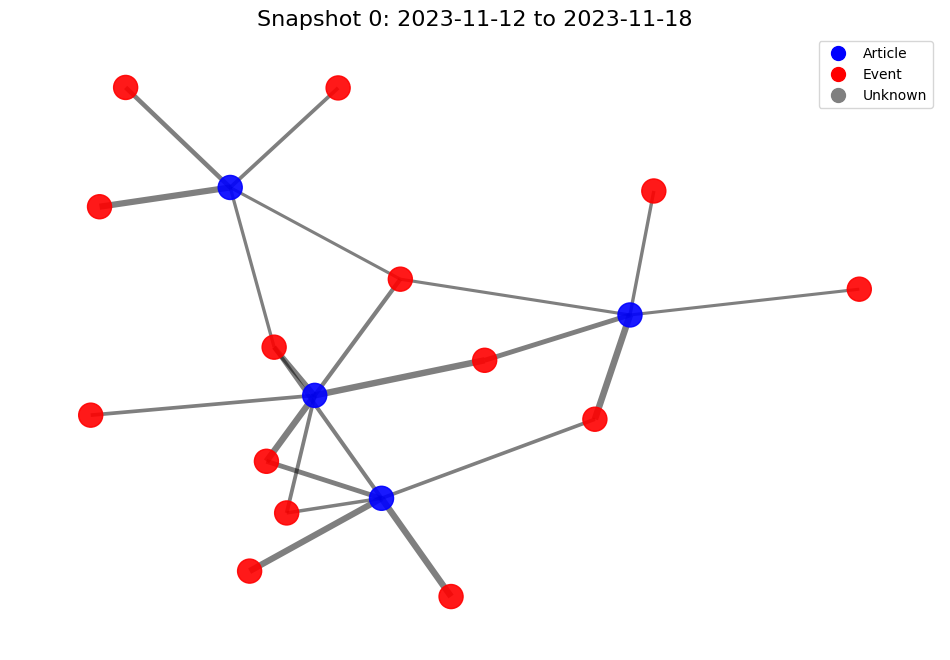

In [ ]:
# Define the start date for the first snapshot
start_date = datetime(2023, 11, 12)  # Adjust as needed

# Define the total number of snapshots (weeks)
total_snapshots = 10  # Example: 10 weeks

# Choose which snapshot to visualize (0-based index)
snapshot_to_visualize = 0  # For Snapshot 2 (index 1)

# Visualize the chosen snapshot
visualize_snapshot(driver, snapshot_to_visualize, start_date, total_snapshots)

Debug: Querying for Article 1 -> Event Event_9
Article 1 -> Event Event_9: Strength = 0.0000
Debug: Querying for Article 2 -> Event Event_8
Article 2 -> Event Event_8: Strength = 0.0000
Debug: Querying for Article 3 -> Event Event_6
Article 3 -> Event Event_6: Strength = 0.0000
Debug: Querying for Article 4 -> Event Event_7
Article 4 -> Event Event_7: Strength = 0.0000
Debug: Querying for Article 5 -> Event Event_3
Article 5 -> Event Event_3: Strength = 0.0000
Debug: Querying for Article 6 -> Event Event_5
Article 6 -> Event Event_5: Strength = 0.0000
Debug: Querying for Article 7 -> Event Event_10
Article 7 -> Event Event_10: Strength = 0.0000
Debug: Querying for Article 8 -> Event Event_2
Article 8 -> Event Event_2: Strength = 0.0000
Debug: Querying for Article 9 -> Event Event_4
Article 9 -> Event Event_4: Strength = 0.0000
Debug: Querying for Article 10 -> Event Event_1
Article 10 -> Event Event_1: Strength = 0.0000
Debug: Querying for Article 11 -> Event Event_0
Article 11 -> Even

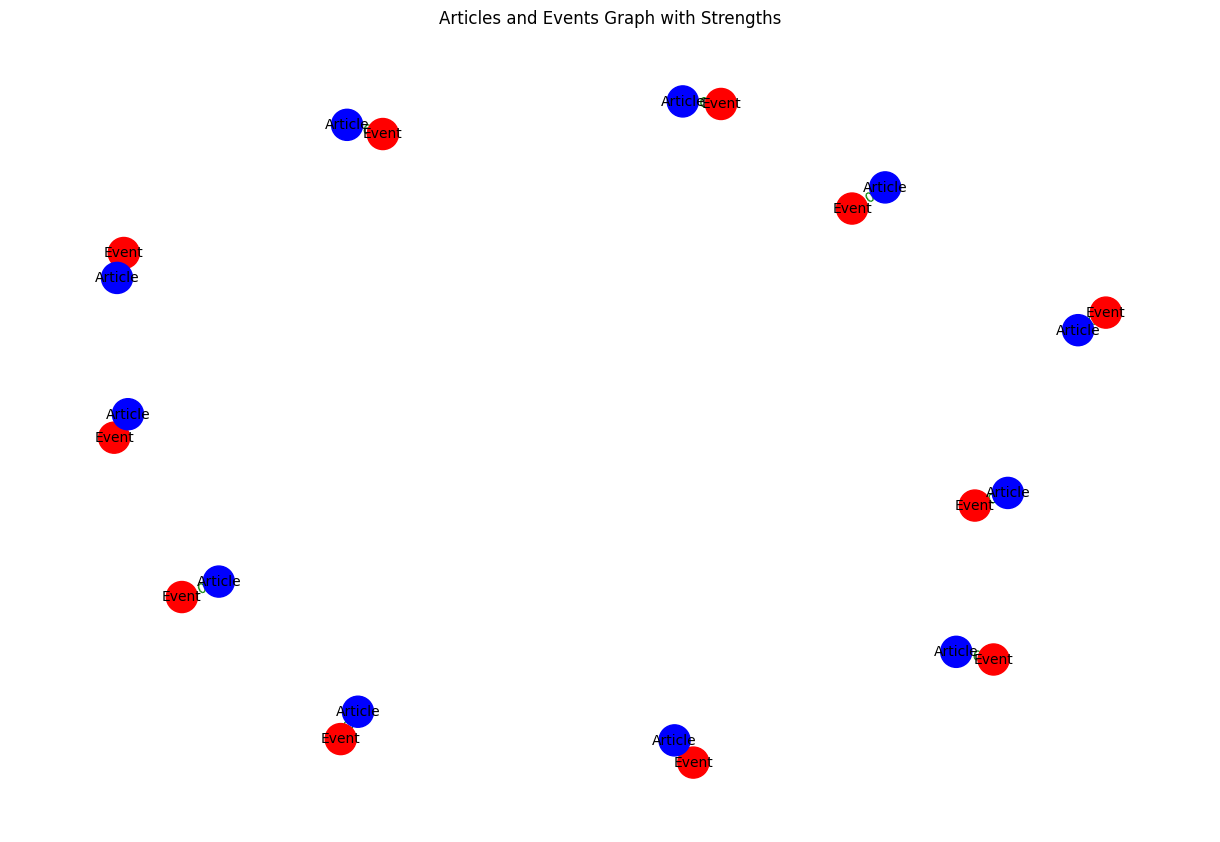

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph_from_snapshot_with_strength(snapshot, driver):
    G = nx.Graph()

    for cluster_id, article_ids in snapshot['clusters'].items():
        event_node = f"Event_{cluster_id}"
        G.add_node(event_node, label='Event', type='event')

        for article_id in article_ids:
            G.add_node(article_id, label='Article', type='article')

            print(f"Debug: Querying for Article {article_id} -> Event {event_node}")

            with driver.session() as session:
                result = session.run("""
                    MATCH (a:Article {id: $article_id})-[r:RELATED_TO]->(e:Event {id: $event_id})
                    RETURN r.strength AS strength
                """, article_id=article_id, event_id=event_node)
                record = result.single()
                strength = record['strength'] if record and 'strength' in record else 0.0

            # Log the retrieved strength
            print(f"Article {article_id} -> Event {event_node}: Strength = {strength:.4f}")

            G.add_edge(article_id, event_node, strength=strength)

    return G


# Function to visualize the graph with edge strengths
def visualize_graph_with_strength(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    node_colors = ['blue' if data['type'] == 'article' else 'red' for _, data in G.nodes(data=True)]

    edge_labels = nx.get_edge_attributes(G, 'strength')
    edge_labels = {edge: f"{strength:.2f}" for edge, strength in edge_labels.items()}

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=500, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')
    plt.title('Articles and Events Graph with Strengths')
    plt.show()

# Example usage with a snapshot
example_snapshot = snapshots[3]  # Using the first week's snapshot as an example
G = create_graph_from_snapshot_with_strength(example_snapshot, driver)
visualize_graph_with_strength(G)



In [ ]:
# Close the Neo4j driver connection
driver.close()